<a href="https://colab.research.google.com/github/EngrIBGIT/Classification_With_PyTorch/blob/main/Neural_Network_Classification_With_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classification with PyTorch

**Classification** is a problem of predicting whether something is one thing or another (There are multiple items as options)

Resources:

* [NoteBookGuide](https://www.learnpytorch.io/02_pytorch_classification/)

* [Guide2](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/00_pytorch_classification.ipynb)



## Make classification Data:

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f"First 5 samples of X: \n{X[:5]}")
print(f"First 5 samples of y : \n{y[:5]}")


First 5 samples of X: 
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y : 
[1 1 1 1 0]


In [5]:
# Make DataFrame of circle data

import pandas as pd
circle = pd.DataFrame({"X1": X[:, 0],
                       "X2": X[:, 1],
                       "label": y})
circle.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


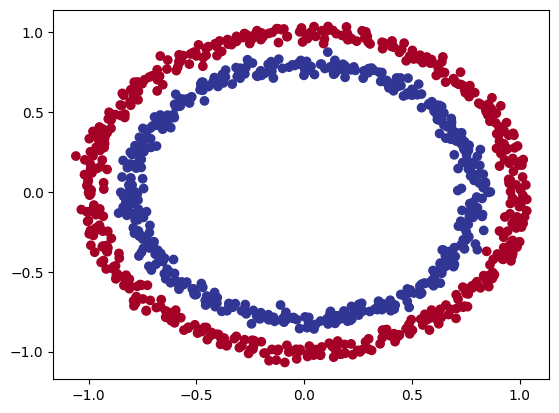

In [6]:
# Visualize
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

*Note:*

 Data is often reffered to as toy dataset, small enough to experiment on  and sizeable enough for practice fundamentals

## Check input and output shapes(because ML deal alot with numbers)

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# View first example of features and labels
X_sample = X[0]
y_sample = y[0]
# View first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one Sample of X: \n{X_sample} and the same for y: {y_sample}")
print(f"Shapes for one Sample of X: \n{X_sample.shape} and the same for y: {y_sample.shape}")


Values for one Sample of X: 
[0.75424625 0.23148074] and the same for y: 1
Shapes for one Sample of X: 
(2,) and the same for y: ()


## Turn data into tensors, create train and test splits

In [9]:
import torch
torch.__version__

'2.4.1+cu121'

In [10]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [11]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [12]:
type(X), X.dtype, type(y), y.dtype

(torch.Tensor, torch.float32, torch.Tensor, torch.float32)

In [13]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [14]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

Build a Model

Building a model to classify the blue and red circles.

To do so:

- Setup device agnostic code to run on accelerator (GPU) if there is one.
- Construct a model by (subclassing `nn.module`)
- Define loss function and optimizer
- Create training loop
- Create testing loop

In [15]:
# Import PyTorch and nn
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [16]:
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

Device agnostic code is setup, now we can build a model

- Subclasses `nn.module`
- Create  `2 nn.Linear()` linear layers
- Define forward() method
- Instantiate model and send to device

In [17]:
# Construct model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # Create 2 nn.Layer capable of handling the shapes of data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # Takes in 2 features and upscale to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # Takes in 5 features from previous layer and output 1 feature

    # Define forward method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1  ->  layer_2 -> output

# Instantiate model and send to device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [18]:
# Check what device its on
device

'cuda'

In [19]:
# Check what device the model is on
next(model_0.parameters()).device

device(type='cuda', index=0)

In [20]:
# Replicating Model above  using  nn.Sequencial()
model_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_1

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

# Move nn.Sequencial into Subclasse method

# Construct model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # Create 2 nn.Layer capable of handling the shapes of data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # Takes in 2 features and upscale to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # Takes in 5 features from previous layer and output 1 feature

    model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
    ).to(device)

    # Define forward method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1  ->  layer_2 -> output

# Instantiate model and send to device
model_0 = CircleModelV0().to(device)
model_0

In [21]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.2794,  0.5523],
                      [-0.0889,  0.6732],
                      [ 0.0256, -0.6583],
                      [ 0.3909, -0.0939],
                      [ 0.4416,  0.0060]], device='cuda:0')),
             ('layer_1.bias',
              tensor([ 0.0991,  0.6531,  0.2717,  0.0681, -0.4874], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2697, -0.3417, -0.0882, -0.3794, -0.4055]], device='cuda:0')),
             ('layer_2.bias', tensor([-0.2311], device='cuda:0'))])

In [22]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape of predictions: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape of predictions: {X_test.shape}")
print(f"\nFirst 10 predictions: \n{untrained_preds[:10]}")
print(f"\nFirst 10 labels: {y_test[:10]}")

Length of predictions: 200, Shape of predictions: torch.Size([200, 1])
Length of test samples: 200, Shape of predictions: torch.Size([200, 2])

First 10 predictions: 
tensor([[-0.1888],
        [-0.2734],
        [-0.1256],
        [-0.2060],
        [-0.3773],
        [-0.4271],
        [-0.4658],
        [-0.5024],
        [-0.1150],
        [-0.2818]], device='cuda:0')

First 10 labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0')


In [23]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

Model above is not making good predictions, Hence we need to train the model

### Setup loss function and optimizer

Note which loss function and optimizer to use, it is problem specific:

E.g For Regression, Mean Absolute Error or Mean Squared Error (MAE or MSE)
E.g For Classification, Categorical Cross Entropy Loss, Binary Cross Entropy Loss, Negative Log Likelihood Loss

Loss function measures wrongness of model's predictions

For Optimizers, the two common ones are SGD and Adam, however there are many more.

 `Common Choices of function and Optimisers` - https://neptune.ai/blog/pytorch-loss-functions, https://learnpytorch.com/optimizers/

* For the loss function we are using `torch.nn.BCEWithLogitsLoss()` Check https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html#torch.nn.BCEWithLogitsLoss
https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a
 Logit in deep learning is the log of the odds. https://stackoverflow.com/a/52111173/7900723

* For the optimizer we are using `torch.optim.SGD()`


https://pytorch.org/docs/stable/nn.html#loss-functions

In [24]:
# Set the Loss function
# loss_fn = nn.BCELoss() # Requires input to go through the sigmoid activation
#nn.Sequential(
    #nn.Sigmoid(),
    #nn.BCELoss()
#)

loss_fn = nn.BCEWithLogitsLoss() # Has sigmoid activation function builtin

# Set the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [25]:
# Calculate accuracy - out of examples what percent are correct
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

## Train Model

To train model: Build a training loop: With the following steps
1. Forward pass
2. Calculate loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)

## From Raw Logit --> prediction probabilities  --> prediction labels

Model outputs = raw **logits**

Convert **logits** to **prediction probabilities** by passing them through a **sigmoid** activation function for binary classification and **softmax** for multi-class classification

Convert **prediction probabilities** to **prediction labels** by either rounding or torch argmax()

In [26]:
# View first 5 outputs of the forward pass on test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.1888],
        [-0.2734],
        [-0.1256],
        [-0.2060],
        [-0.3773]], device='cuda:0')

In [27]:
y_test[:5]

tensor([1., 0., 1., 0., 1.], device='cuda:0')

In [28]:
# Use sigmoid actiivation function on model logical_and_logits to turn them into prediction probabilities

y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4530],
        [0.4321],
        [0.4687],
        [0.4487],
        [0.4068]], device='cuda:0')

In [29]:
# pass through
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')

For prediction probability values, there is need to perform a round function:
* `y_pred_probs >=0.5, y=1 (class 1)`
* `y_pred_probs <0.5, y=0 (class 0)`

In [30]:
# Find the prediction labels
y_preds = torch.round(y_pred_probs)


# In full (logusts -> ped probs -> pred labels)
y_preds_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_preds_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0')

In [31]:
y_test[:5]

tensor([1., 0., 1., 0., 1.], device='cuda:0')

In [32]:
## Build a training and test loop

torch.manual_seed(42)
torch.cuda.manual_seed(42) # For operations on cuda device

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build Training and Evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # 2. Calculate loss/ accuracy
  #loss = loss_fn(torch.sigmoid(y_logits), # nn.BCEloss expects rprediction probabilities as input
                #  y_train)
  loss = loss_fn(y_logits, # nn.BCEWithLogitsloss expects raw logits as input
                 y_train)
  accuracy_fn(y_true=y_train,
              y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate loss/ accuracy
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
    
    # print out whats happening
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {accuracy_fn(y_true=y_train, y_pred=y):.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

In [34]:
# Build Training and Evaluation loop
epochs = 100 # Define the number of epochs
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # 2. Calculate loss/ accuracy
  #loss = loss_fn(torch.sigmoid(y_logits), # nn.BCEloss expects rprediction probabilities as input
                #  y_train)
  loss = loss_fn(y_logits, # nn.BCEWithLogitsloss expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true=y_train, # Changed here to calculate accuracy with y_pred
              y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate loss/ accuracy
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    # print out whats happening
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%") # Changed here to use the accuracy previously calculated

Epoch: 0 | Loss: 0.70587, Accuracy: 50.00% | Test Loss: 0.70225, Test Accuracy: 50.00%
Epoch: 10 | Loss: 0.69911, Accuracy: 43.75% | Test Loss: 0.69673, Test Accuracy: 47.00%
Epoch: 20 | Loss: 0.69665, Accuracy: 48.50% | Test Loss: 0.69496, Test Accuracy: 47.00%
Epoch: 30 | Loss: 0.69560, Accuracy: 49.38% | Test Loss: 0.69436, Test Accuracy: 48.00%
Epoch: 40 | Loss: 0.69504, Accuracy: 50.12% | Test Loss: 0.69413, Test Accuracy: 47.50%
Epoch: 50 | Loss: 0.69467, Accuracy: 49.75% | Test Loss: 0.69403, Test Accuracy: 48.50%
Epoch: 60 | Loss: 0.69439, Accuracy: 50.38% | Test Loss: 0.69398, Test Accuracy: 48.50%
Epoch: 70 | Loss: 0.69417, Accuracy: 50.50% | Test Loss: 0.69395, Test Accuracy: 48.50%
Epoch: 80 | Loss: 0.69399, Accuracy: 50.12% | Test Loss: 0.69394, Test Accuracy: 49.50%
Epoch: 90 | Loss: 0.69383, Accuracy: 49.88% | Test Loss: 0.69394, Test Accuracy: 49.00%


In [35]:
loss_fn

BCEWithLogitsLoss()

In [36]:
# loss_fnBCEWithLogitsLoss = nn.BCEWithLogitsLoss()
loss_fn_without_logits = nn.BCELoss()
loss_fn_without_logits

BCELoss()

## Make Predictions and evaluate the model

From the metrics, model is not learning...

Inspect and make some predicitions

Visualize predictions

Import `plot_decision_boundary()` to help with

CHECK: [madewithml](https://madewithml.com/courses/foundations/neural-networks/)



In [37]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo ( if its not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

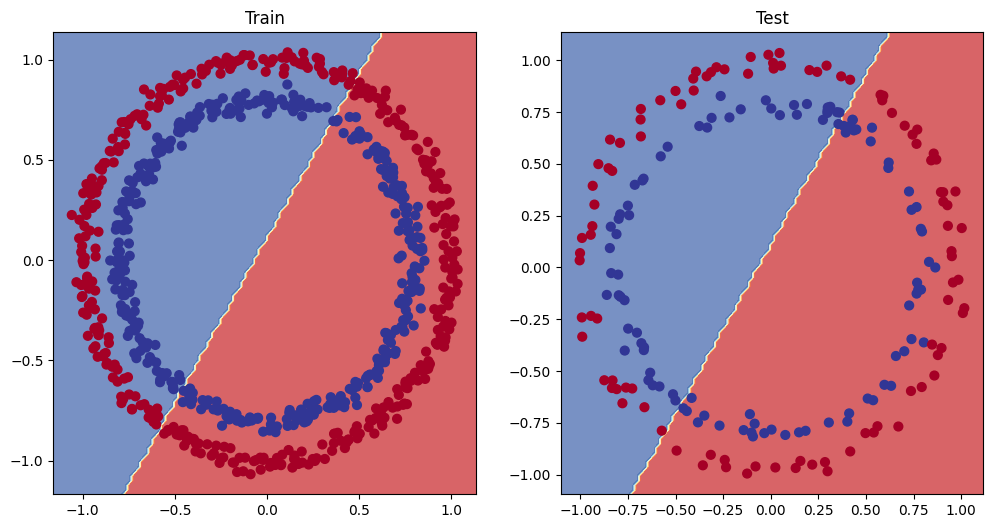

In [38]:
# Plot decision boundary of model

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## Options to improve a model

### Improving a model (a model's perspective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - give the model more room to learn from the data
* Fit the model for more epochs - the more the model has the opportunity to learn
* Change activation functions
* Change the loss function
* Change the optimizer (Change learning rate, momentum, etc)


These options will be from a model's perspective becuase they will impact how the model learns.

ALl the options are all values (ML and DS ) can change reffered to as **hyperparameters**.

Improving model by:

* Adding more hidden units 5 -> 10
* Increase number of layers 2 -> 3
* Increase number of epochs 100 -. 1000

In [39]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x))) # This way leverages speed ups.

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [40]:
# Create Loss Function
loss_fn = nn.BCEWithLogitsLoss()

# Create Optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [41]:
# Training and Evaluation loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # 2. Calculate loss/ accuracy
  loss = loss_fn(y_logits, # nn.BCEWithLogitsloss expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true=y_train, # Changed here to calculate accuracy with y_pred
              y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    #1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate loss/ accuracy
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
# Print Out whats happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.70899, Accuracy: 50.00% | Test Loss: 0.70431, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69301, Accuracy: 50.75% | Test Loss: 0.69449, Test Accuracy: 46.00%
Epoch: 200 | Loss: 0.69298, Accuracy: 51.50% | Test Loss: 0.69459, Test Accuracy: 47.50%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.25% | Test Loss: 0.69464, Test Accuracy: 46.50%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.50% | Test Loss: 0.69466, Test Accuracy: 45.50%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.50% | Test Loss: 0.69467, Test Accuracy: 45.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.25% | Test Loss: 0.69468, Test Accuracy: 45.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.12% | Test Loss: 0.69468, Test Accuracy: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.12% | Test Loss: 0.69468, Test Accuracy: 46.00%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test Loss: 0.69468, Test Accuracy: 46.00%


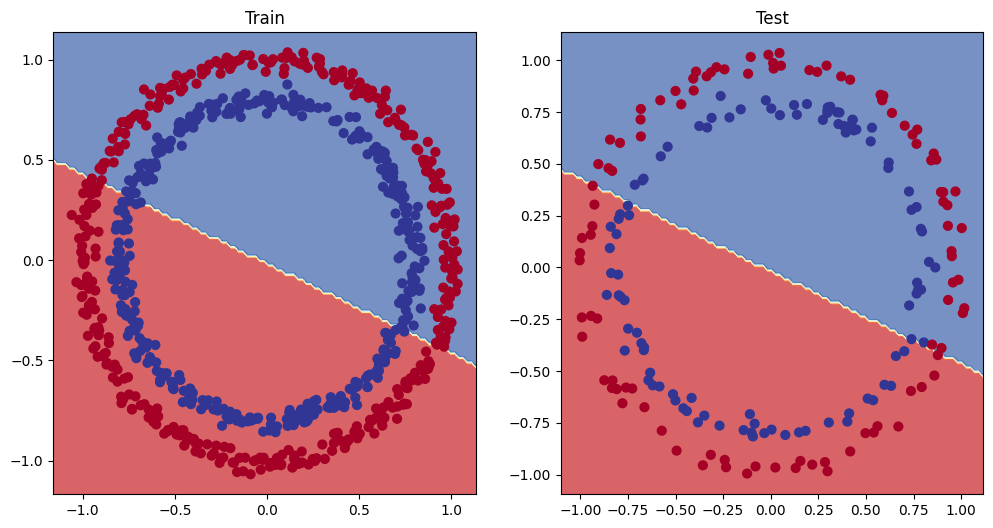

In [42]:
# Plot the decision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

# TROUBLESHOOTING

Prepare data for model to fit a straight line

Test out a smaller problem to trouble shoot a larger problem


In [43]:
import torch # Importing torch to use its functions

# Create Some Data (A smaller Data)

weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create Data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # Linear Regression formula (without epsilon)

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [44]:
# Create Train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:] # Creating the test set

# Check the lengths of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

In [45]:
import matplotlib.pyplot as plt
import torch

def plot_predictions(train_data, train_labels, test_data, test_labels, predictions=None):
    """
    Plots training data, test data and predictions.

    Args:
        train_data: Training data.
        train_labels: Training labels.
        test_data: Test data.
        test_labels: Test labels.
        predictions: Predictions, if available.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    # Plot predictions if they exist
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show legends and title
    plt.legend(prop={"size": 14})
    plt.title("Regression Data and Predictions") # Added a title for clarity
    plt.xlabel("X") # Added an x-axis label
    plt.ylabel("y") # Added a y-axis label
    plt.show()


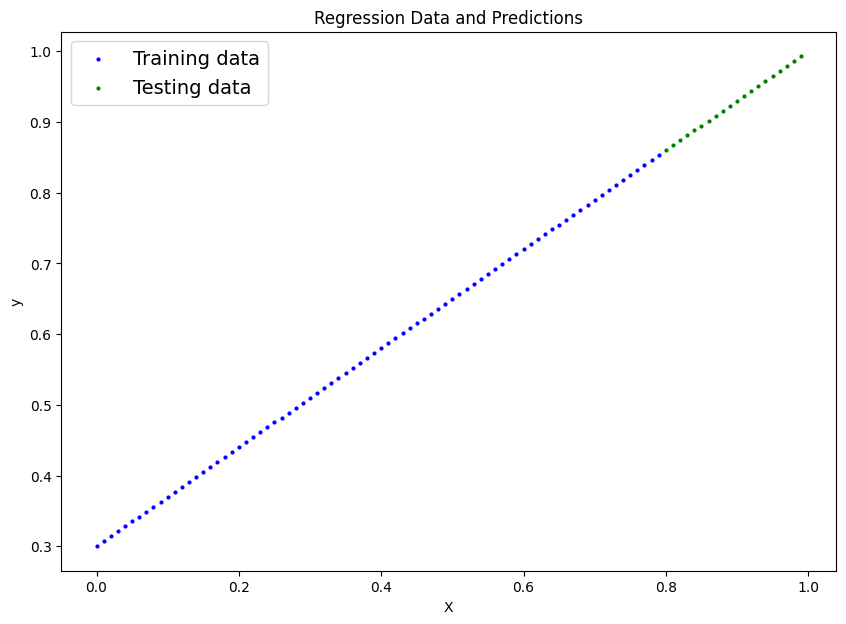

In [46]:
# Plot Data(plot_predictions )
plot_predictions(train_data = X_train_regression,
                 train_labels = y_train_regression,
                 test_data = X_test_regression,
                 test_labels = y_test_regression);

In [47]:
X_train_regression, y_train_regression

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900],
         [0.1000],
         [0.1100],
         [0.1200],
         [0.1300],
         [0.1400],
         [0.1500],
         [0.1600],
         [0.1700],
         [0.1800],
         [0.1900],
         [0.2000],
         [0.2100],
         [0.2200],
         [0.2300],
         [0.2400],
         [0.2500],
         [0.2600],
         [0.2700],
         [0.2800],
         [0.2900],
         [0.3000],
         [0.3100],
         [0.3200],
         [0.3300],
         [0.3400],
         [0.3500],
         [0.3600],
         [0.3700],
         [0.3800],
         [0.3900],
         [0.4000],
         [0.4100],
         [0.4200],
         [0.4300],
         [0.4400],
         [0.4500],
         [0.4600],
         [0.4700],
         [0.4800],
         [0.4900],
         [0.5000],
         [0.5100],
         [0.

In [48]:
import torch
import torch.nn as nn # importing torch.nn as nn

# ... (rest of your code) ...

# Check for CUDA availability and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# ... (rest of your training code) ...

In [49]:
# Adjusting model to fit straight line
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device) # Assuming device is defined somewhere

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [50]:
# Loss and Optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [51]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  # Print out whats happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.75986 | Test Loss: 0.91103
Epoch: 100 | Loss: 0.02858 | Test Loss: 0.00081
Epoch: 200 | Loss: 0.02533 | Test Loss: 0.00209
Epoch: 300 | Loss: 0.02137 | Test Loss: 0.00305
Epoch: 400 | Loss: 0.01964 | Test Loss: 0.00341
Epoch: 500 | Loss: 0.01940 | Test Loss: 0.00387
Epoch: 600 | Loss: 0.01903 | Test Loss: 0.00379
Epoch: 700 | Loss: 0.01878 | Test Loss: 0.00381
Epoch: 800 | Loss: 0.01840 | Test Loss: 0.00329
Epoch: 900 | Loss: 0.01798 | Test Loss: 0.00360


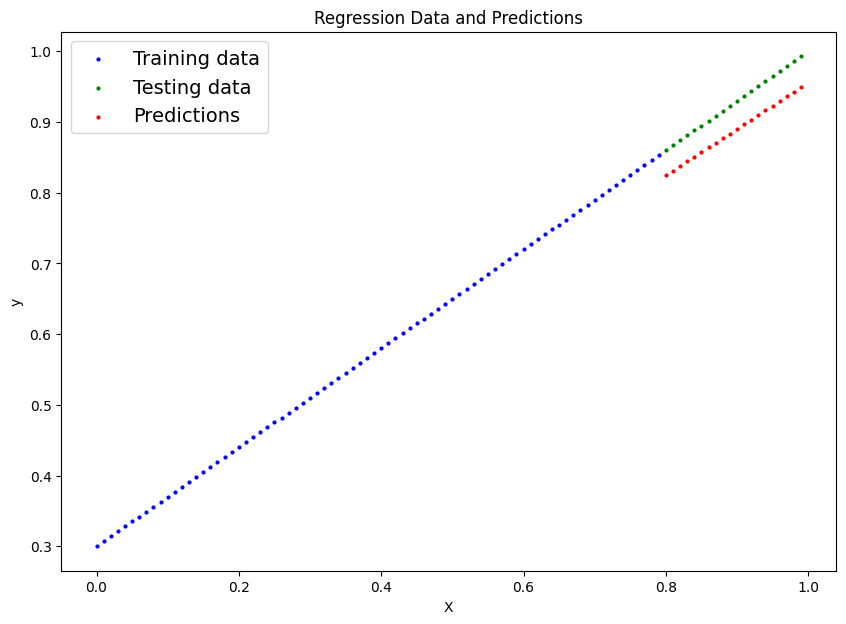

In [52]:
# Turn on evaluation mode
model_2.eval

# Make predictions (inference)
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

# Plot data and predictions
plot_predictions(train_data = X_train_regression.cpu(),
                 train_labels = y_train_regression.cpu(),
                 test_data = X_test_regression.cpu(),
                 test_labels = y_test_regression.cpu(),
                 predictions = y_preds.cpu());

## DATA NEEDS NON LINEARITY:

"What patterns to draw given an infinite amount of straight and non-straight lines"

Machine Learnong terms, an infinite (but finite) of linear and non-linear patterns. functions


Recreate non linear data data (red and blue circle)

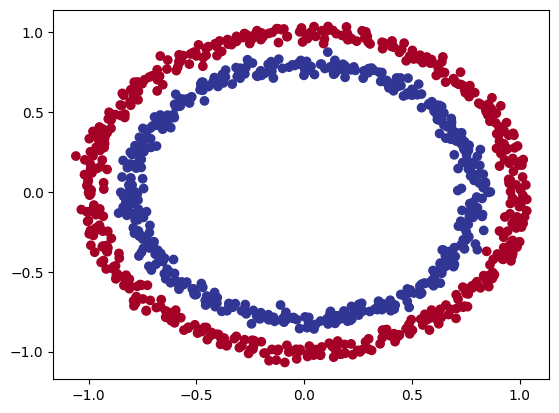

In [53]:
# Make and plot data

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [54]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

## Building a model with non linearity

* Linear = Straight lines
* Non Linear = Non-Straight lines e.g Circle

In [55]:
# Build a model with non-linear activation functions
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # <- add in ReLU activation function, a non-linear activation function

  def forward(self, x):
    # Putting the non-linear activation functions
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [56]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)

# Train model with non-linearity

In [58]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop Through data
# Set the number of epochs
epochs = 1000

for epoch in range(epochs):
  ### Training
  model_3.train()

  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # 2. Calculate loss/ accuracy
  loss = loss_fn(y_logits,
                 y_train) # BCEWithLogitsLoss (takes in logits as first input)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate loss/ accuracy
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

# Print out whats happeneing
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.6929, Accuracy: 50.00% | Test Loss: 0.6932, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.6912, Accuracy: 52.88% | Test Loss: 0.6910, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.6898, Accuracy: 53.37% | Test Loss: 0.6894, Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.6879, Accuracy: 53.00% | Test Loss: 0.6872, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.6852, Accuracy: 52.75% | Test Loss: 0.6841, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.6810, Accuracy: 52.75% | Test Loss: 0.6794, Test Accuracy: 56.50%
Epoch: 600 | Loss: 0.6751, Accuracy: 54.50% | Test Loss: 0.6729, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.6666, Accuracy: 58.38% | Test Loss: 0.6632, Test Accuracy: 59.00%
Epoch: 800 | Loss: 0.6516, Accuracy: 64.00% | Test Loss: 0.6476, Test Accuracy: 67.50%
Epoch: 900 | Loss: 0.6236, Accuracy: 74.00% | Test Loss: 0.6215, Test Accuracy: 79.00%


## Evaluate Model trained with non-linear activation function

In [59]:
# Make predictions
model_3.eval()
with torch.inference_mode():
  y_logits = model_3(X_test).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
y_pred[:10], y_test[:10]


(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

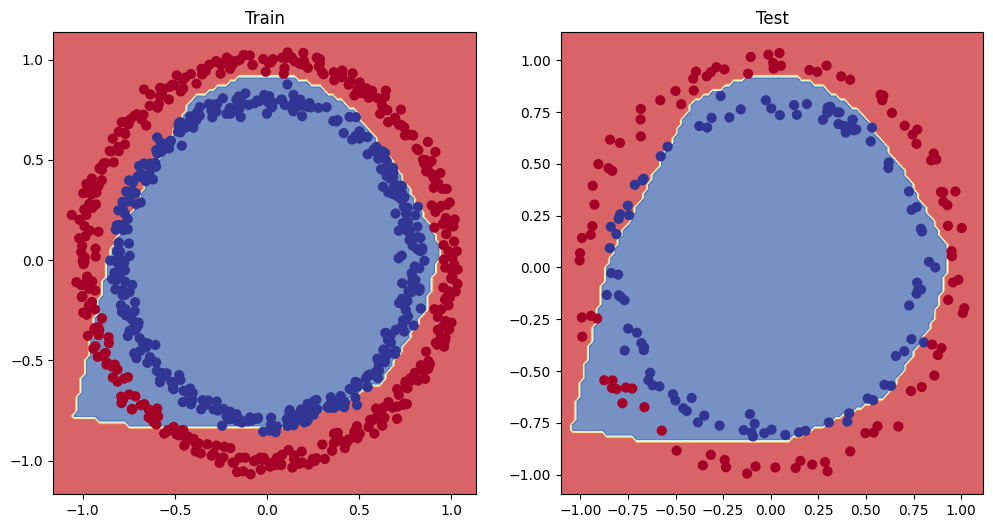

In [60]:
# Plot decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)